In [4]:
from torchvision.io import read_image
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import models

# Fully Convolutional Networks (FCN) for Image Segmentation:

The FCN that we will use is trained to segment 21 object categories including vehicles, household, animals, and other: aeroplane, bicycle, boat, bus, car, motorbike, train, bottle, chair, dining table, potted plant, sofa, TV/monitor, bird, cat, cow, dog, horse, sheep, and person. So the final layer dimensions are 21xWxH

[Additional Reading](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/1411.4038.pdf)


[Additional Reading](https://pytorch.org/vision/stable/models/fcn.html)
)

In [5]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights

#if you get ssl error run following
#import ssl
#ssl._create_default_https_context = ssl._create_stdlib_context

# Step 1: Initialize model with the weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()


(<matplotlib.image.AxesImage at 0x13ffca1d0>,
 (-0.5, 779.5, 519.5, -0.5),
 Text(0.5, 1.0, 'output channel #14'))

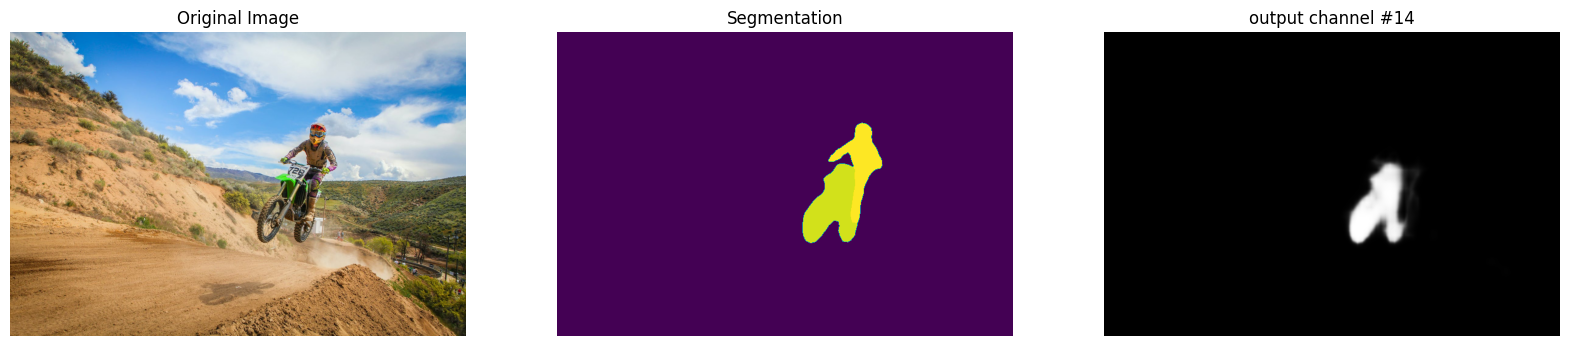

In [7]:
# Step 3: Apply the model to the image
img = read_image("./data/images/motorbike.jpeg")
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]

# Apply softmax to get the probabilities
normalized_masks = prediction.softmax(dim=1)

class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["motorbike"]]
_,segmentation = torch.max(normalized_masks.squeeze(0), dim=0)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(transforms.ToPILImage()(img)), plt.axis('off'), plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(segmentation.detach().numpy()), plt.axis('off'), plt.title('Segmentation')

plt.subplot(1,3,3)
plt.imshow(mask.detach().numpy(), cmap='gray'), plt.axis('off'), plt.title('output channel #' + str(class_to_idx["motorbike"]))



# Object Detection

In [6]:
# Install ultralytics so that we can access Yolo maintained by ultralytics
#!pip install -U ultralytics

yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /Users/oarif/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-22 Python-3.10.10 torch-2.2.1 CPU

ERROR: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>
Re-attempting https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.pt to yolov5s.pt...
######################################################################## 100.0%

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


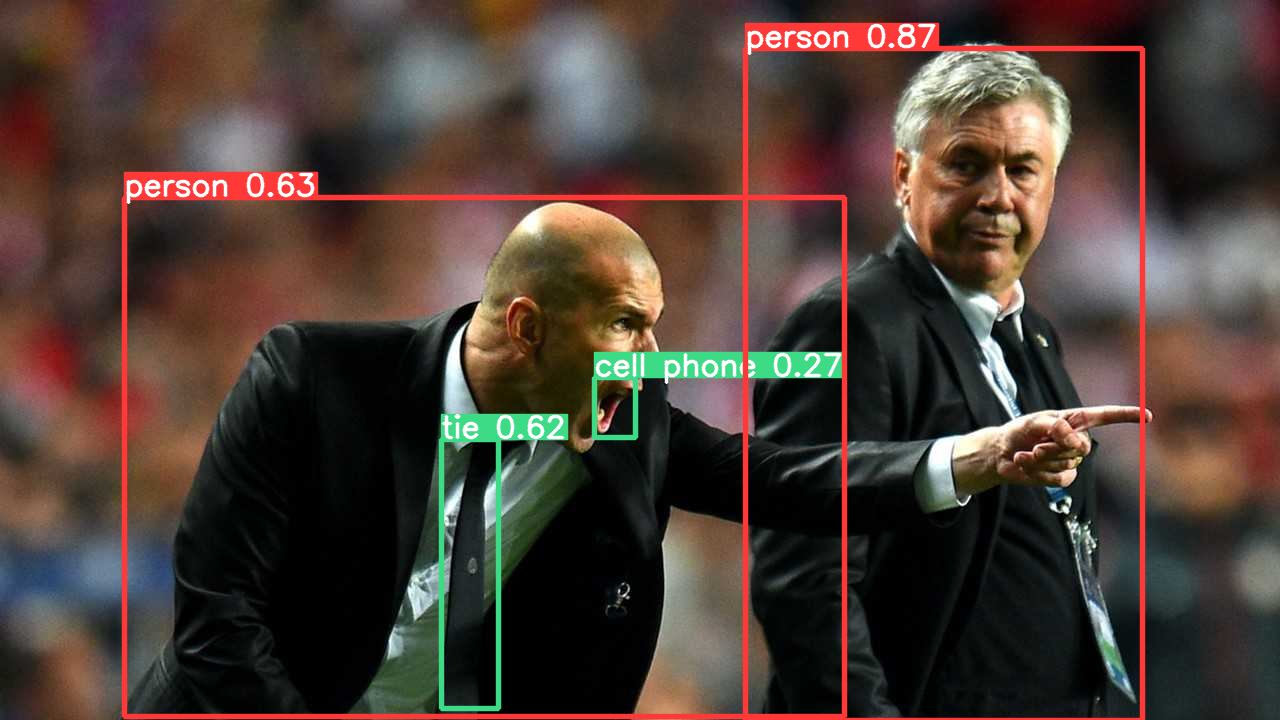

tensor([[9.44136e+02, 3.84235e+02, 3.97115e+02, 6.71530e+02, 8.68910e-01, 0.00000e+00],
        [4.84571e+02, 4.56992e+02, 7.19653e+02, 5.19316e+02, 6.30324e-01, 0.00000e+00],
        [4.69810e+02, 5.73961e+02, 5.71421e+01, 2.69220e+02, 6.16793e-01, 2.70000e+01],
        [6.14753e+02, 4.07224e+02, 4.13422e+01, 5.98475e+01, 2.74014e-01, 6.70000e+01]])

In [7]:
imgs = ['https://ultralytics.com/images/zidane.jpg']
#imgs = ['./data/images/motorbike.jpeg']
results = yolo_model(imgs)
results.show()
results.xywh[0]